In [3]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from past.builtins import xrange

In [18]:
# Make the dataset
N = 100 # Number of points per class
D = 2 # Dimensionality
K = 3 # Number of classes
X_train = np.zeros((N*K,D)) # data matrix (each row = single example)
y_train = np.zeros((N*K, K), dtype='uint8')
for j in xrange(K):
    ix = range(N*j, N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    X_train[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y_train[ix,N*[j]] = 1

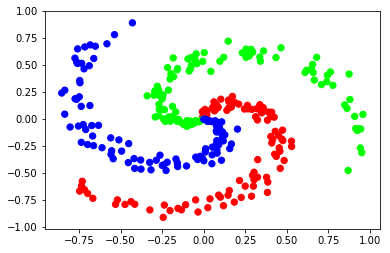

In [20]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=40, cmap=plt.cm.Spectral)
plt.show()

In [22]:
x_size = D
h_size = 100 # size of hidden layer
y_size = K

X = tf.placeholder("float", shape=[None, x_size])
y = tf.placeholder("float", shape=[None, y_size])

W1 = tf.Variable(tf.random_normal([x_size,h_size],stddev=1.0/np.sqrt(float(x_size))))
b1 = tf.Variable(tf.zeros([1,h_size]))

W2 = tf.Variable(tf.random_normal([h_size,y_size],stddev=1.0/np.sqrt(float(h_size))))
b2 = tf.Variable(tf.zeros([1,y_size]))

hidden = tf.nn.relu(tf.matmul(X,W1)+b1)
logits = tf.matmul(hidden,W2)+b2
predict = tf.argmax(logits,axis=1)

In [23]:
learning_rate = 1e-0
reg = 1e-3

data_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
reg_loss = 0.5*reg*(tf.reduce_sum(tf.multiply(W1,W1))+tf.reduce_sum(tf.multiply(W2,W2)))
loss = data_loss + reg_loss

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

In [30]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

num_epochs = 400
display_step = 50

for epoch in range(num_epochs):
    sess.run(train_op, feed_dict={X: X_train, y: y_train})
    accuracy = np.mean(np.argmax(y_train, axis=1) == sess.run(predict, feed_dict={X: X_train, y: y_train}))
    if epoch % display_step == 0:
        print("Epoch = %d, accuracy = %.2f%%" % (epoch, 100.*accuracy))


Epoch = 0, accuracy = 53.00%
Epoch = 50, accuracy = 88.67%
Epoch = 100, accuracy = 93.33%
Epoch = 150, accuracy = 95.00%
Epoch = 200, accuracy = 96.33%
Epoch = 250, accuracy = 97.00%
Epoch = 300, accuracy = 97.33%
Epoch = 350, accuracy = 97.67%


[[-0.88084596  1.25768948 -0.35663792  0.11911712 -0.44729233 -1.13926017
   1.36522782  0.05669156 -0.18362015 -0.37721422 -0.80034846 -0.33901471
   1.06507087  0.46336612  0.91551119  0.10812733 -0.409619    0.03924979
  -0.50659209  0.71503305  0.98126417 -0.95604789  0.21789452 -1.0806464
  -1.75431859 -0.74094099  0.03479976 -0.29756927 -0.14628708  0.45586869
  -0.33255538 -0.56015879  2.10309982 -1.0509063  -0.1346084  -0.53095281
  -0.09524534 -1.24843168 -1.13139904 -0.18594794  0.01417166 -0.59385693
  -0.2125442  -0.03833446 -0.02864213  0.83006752 -0.47521406 -0.7929911
  -0.07666381 -0.03395073  0.20273644 -1.24257994  1.01525605  1.28484237
   0.1778021  -1.65689373  0.81386691 -0.31129131  0.7026872  -1.13528407
  -0.08750517 -1.51231706  1.02790928  0.75376827 -0.68091947  0.12504661
  -2.14872336  0.20138124 -0.77317899  0.56246001 -0.39343512  0.42932194
   0.23442352  0.11375862 -0.01456445  1.29256797 -0.24712043  0.87023759
   0.19600509  2.23399091  1.0401299  -0